<a href="https://colab.research.google.com/github/taishi-i/toiro/blob/develop/examples/01_getting_started_ja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>1. はじめに</strong>
---

[Toiro](https://github.com/taishi-i/toiro) は、形態素解析器を比較する Python ライブラリです。

各解析器の比較を数行のコードで行えます。
*   処理速度の比較
*   単語分割の比較
*   後段タスク（テキスト分類）での精度比較

Google Colab では、下記のインストールで、7種類の解析器を比較することができます。
```
pip install toiro[all_tokenizers]
```



In [1]:
pip install toiro[all_tokenizers]

     |████████████████████████████████| 634kB 2.6MB/s 
     |████████████████████████████████| 21.5MB 1.4MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
     |████████████████████████████████| 17.1MB 243kB/s 
     |████████████████████████████████| 21.5MB 1.3MB/s 
     |████████████████████████████████| 5.2MB 48.9MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 10.0MB 47.0MB/s 
     |████████████████████████████████| 28.1MB 152kB/s 
     |████████████████████████████████| 481kB 47.9MB/s 
     |████████████████████████████████| 51.5MB 76kB/s 
     |████████████████████████████████| 2.1MB 17.3MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20069 sha256=c021ca059c5f6cd96b0d37b003df8b747e810a6f18419b68a8def8e681c14e1e
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0

In [2]:
# 各ライブラリのインポート
import pprint
import warnings

import matplotlib.pyplot as plt

from toiro import tokenizers
from toiro import datadownloader
from toiro import classifiers

warnings.simplefilter('ignore')

# <strong>2. 解析器の一覧を表示する</strong>

---

Toiroでは、次の解析器（単語分割器、形態素解析器、サブワードトークナイザー）を比較することができます。

*   mecab-python3
*   janome
*   nagisa
*   spacy
*   sudachipy
*   ginza
*   sentencepiece
*   KyTea（本体のインストールが必要）
*   Juman++（本体のインストールが必要）


また、Docker Hub からコンテナを利用することで、環境構築なしに9種類の解析器を比較することができます。

```
$ docker run --rm -it taishii/toiro /bin/bash
```



In [3]:
# 実行環境で利用可能な解析器の表示
available_tokenizers = tokenizers.available_tokenizers()
pprint.pprint(available_tokenizers)

{'ginza': {'is_available': True, 'version': '2.3.2'},
 'janome': {'is_available': True, 'version': '0.3.10'},
 'jumanpp': {'is_available': False, 'version': False},
 'kytea': {'is_available': False, 'version': False},
 'mecab-python3': {'is_available': True, 'version': '0.996'},
 'nagisa': {'is_available': True, 'version': '0.2.7'},
 'sentencepiece': {'is_available': True, 'version': '0.1.91'},
 'spacy': {'is_available': True, 'version': '2.3.2'},
 'sudachipy': {'is_available': True, 'version': '0.4.9'}}


# <strong>3. コーパスのダウンロードする</strong>

---
Toiroでは、日本語コーパスのダウンローダーと前処理機能を標準で搭載しています。

現時点では、3種類の日本語コーパスが利用することができます。
*   Livedoor news corpus
*   Yahoo movie reviews
*   Amazon_reviews

コーパスのダウンロード後は、内部で前処理を行い、pandas.DataFrame として扱うことができます。

In [4]:
# ダウンロード可能なコーパスの一覧を表示する
corpora = datadownloader.available_corpus()
print(corpora)

['livedoor_news_corpus', 'yahoo_movie_reviews', 'amazon_reviews']


In [5]:
# Livedoor News Corpus をダウンロードし、pandas.DataFrame として読み込む。
corpus = corpora[0]
datadownloader.download_corpus(corpus)
train_df, dev_df, test_df = datadownloader.load_corpus(corpus)
texts = train_df[1]
train_df.head()

,0,1
0,livedoor-homme,上達はスイングチェックから！ 1秒間 最大1000コマ撮影でスイングを磨け
1,it-life-hack,Ultrabookユーザー必見！爆速無線LANルーターのレビューアー5名を募集
2,kaden-channel,赤っ恥！ 釈由美子に続き及川光博もiPhoneがよくわかっていなかった【話題】
3,kaden-channel,楽しいことにもいつかは終わりが・・・Google「Picnik」終了のお知らせが気になる【話題】
4,livedoor-homme,【特集/JOURNEY】 刺激的で優しいアラブの国へ （4/8）


# <strong>4. 各解析器の処理速度を比較する</strong>

---

ダウンロードした Livedoor news corpus を利用して、各解析器の処理速度を比較します。

実行環境の情報、入力テキストの情報、各解析器の処理速度を、辞書形式で出力します。

In [6]:
# tokenizers.compare では、リストを入力とします。
report = tokenizers.compare(texts)
pprint.pprint(report)

  0%|          | 0/5900 [00:00<?, ?it/s]

[1/7] Tokenizer: mecab-python3
[2/7] Tokenizer: janome


  0%|          | 17/5900 [00:00<00:34, 168.45it/s]

[3/7] Tokenizer: nagisa


  1%|          | 49/5900 [00:00<00:11, 487.96it/s]

[4/7] Tokenizer: sudachipy


  1%|          | 37/5900 [00:00<00:15, 368.82it/s]

[5/7] Tokenizer: spacy


  1%|          | 35/5900 [00:00<00:16, 349.11it/s]

[6/7] Tokenizer: ginza


100%|██████████| 5900/5900 [00:00<00:00, 56348.35it/s]

[7/7] Tokenizer: sentencepiece
{'data': {'average_length': 37.67338983050848, 'number_of_sentences': 5900},
 'execution_environment': {'arch': 'X86_64',
                           'brand_raw': 'Intel(R) Xeon(R) CPU @ 2.20GHz',
                           'count': 2,
                           'python_version': '3.6.9.final.0 (64 bit)'},
 'ginza': {'elapsed_time': 17.412731170654297},
 'janome': {'elapsed_time': 11.319151639938354},
 'mecab-python3': {'elapsed_time': 0.14128446578979492},
 'nagisa': {'elapsed_time': 23.325312614440918},
 'sentencepiece': {'elapsed_time': 0.10537481307983398},
 'spacy': {'elapsed_time': 16.687149047851562},
 'sudachipy': {'elapsed_time': 13.848877429962158}}


# <strong>5. 各解析器の単語分割を比較する</strong>

---

入力テキストの単語分割結果を比較できます。

tokenizers.tokenize_*TOKENIZER_NAME* を利用することで、各解析器の単語分割の結果を取得できます。

In [7]:
text = "都庁所在地は新宿区。"
tokenizers.print_words(text, delimiter="|")

mecab-python3: 都庁|所在地|は|新宿|区|。
       janome: 都庁|所在地|は|新宿|区|。
       nagisa: 都庁|所在|地|は|新宿|区|。
    sudachipy: 都庁|所在地|は|新宿区|。
        spacy: 都庁|所在|地|は|新宿|区|。
        ginza: 都庁|所在地|は|新宿区|。
sentencepiece: ▁|都|庁|所在地|は|新宿|区|。


In [8]:
# sudachipy の単語分割結果の結果
words = tokenizers.tokenize_sudachipy(text)
print(words)

['都庁', '所在地', 'は', '新宿区', '。']


In [9]:
# sentencepiece の単語分割結果の結果
words = tokenizers.tokenize_sentencepiece(text)
print(words)

['▁', '都', '庁', '所在地', 'は', '新宿', '区', '。']


# <strong>6. 各解析器の結果を取得する</strong>

---

Toiroでは、各解析器の元の解析結果を取得できます。

tokenizers.original_*TOKENIZER_NAME* を利用することで、各解析器の元の解析結果を取得できます。

In [10]:
# mecab-python3 の解析結果
tokens = tokenizers.original_mecab(text)
print(tokens)

都庁	名詞,一般,*,*,*,*,都庁,トチョウ,トチョー
所在地	名詞,一般,*,*,*,*,所在地,ショザイチ,ショザイチ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
新宿	名詞,固有名詞,地域,一般,*,*,新宿,シンジュク,シンジュク
区	名詞,接尾,地域,*,*,*,区,ク,ク
。	記号,句点,*,*,*,*,。,。,。
EOS



In [11]:
# GiNZA の解析結果
token = tokenizers.original_ginza(text)
for sent in token.sents:
    for token in sent:
        print(token.i, token.orth_, token.lemma_, token.pos_, token.tag_, token.dep_, token.head.i)
    print('EOS')

0 都庁 都庁 NOUN 名詞-普通名詞-一般 compound 1
1 所在地 所在地 NOUN 名詞-普通名詞-一般 nsubj 3
2 は は ADP 助詞-係助詞 case 1
3 新宿区 新宿区 PROPN 名詞-固有名詞-地名-一般 ROOT 3
4 。 。 PUNCT 補助記号-句点 punct 3
EOS


# <strong>7. 後段タスク（テキスト分類）による精度比較</strong>

---

Toiroでは、SVM と BERT によるテキスト分類機能を搭載しています。

ここでは、SVM によるテキスト分類結果を比較することで、単語分割の性能を比較します。

BERT を利用する場合は、次のインストールを行ってください。
```
pip install toiro[all]
```

In [12]:
# Janome を単語分割に利用した SVM モデルの学習  
model = classifiers.SVMClassificationModel(tokenizer='janome')                                                                                                                                   
model.fit(train_df, dev_df)                                                     
                                                                                
# 分類精度の評価                                               
result = model.eval(test_df)                                                    
print(result)

accuracy_score: 0.8629579375848032
macro_f1_score: 0.8502901379913911
classification_report:                 precision    recall  f1-score   support

dokujo-tsushin       0.80      0.80      0.80        92
  it-life-hack       0.88      0.94      0.91        80
 kaden-channel       0.97      0.92      0.95        85
livedoor-homme       0.88      0.56      0.69        41
   movie-enter       0.82      0.90      0.86        88
        peachy       0.78      0.74      0.76        90
          smax       0.96      0.97      0.97       101
  sports-watch       0.88      0.90      0.89        82
    topic-news       0.80      0.87      0.83        78

      accuracy                           0.86       737
     macro avg       0.86      0.85      0.85       737
  weighted avg       0.86      0.86      0.86       737

elapsed_time: 10.702186107635498


[1/7]: mecab-python3, 0.8575305291723202, 0.6454024314880371
[2/7]: janome       , 0.8629579375848032, 10.711235046386719
[3/7]: nagisa       , 0.858887381275441, 22.560673236846924
[4/7]: sudachipy    , 0.8616010854816825, 11.029358625411987
[5/7]: spacy        , 0.8724559023066486, 13.467071771621704
[6/7]: ginza        , 0.8656716417910447, 14.141202211380005
[7/7]: sentencepiece, 0.8670284938941656, 0.6916823387145996


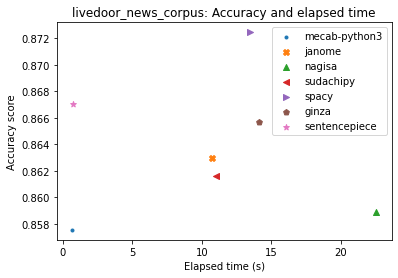

In [13]:
# matplotlib のマーカを定義する
markers = [".", "X", "^", "<", ">", "p", "*"]

# 実行環境で利用できる解析器を取得する
avaiable_tokenizers = tokenizers.get_avaiable_tokenizers()
num_tokenizers = len(avaiable_tokenizers.items())

# 各解析器を利用した SVM モデル学習と評価を行う
for i, (k, v) in  enumerate(avaiable_tokenizers.items(), 1):                                                                      
    model = classifiers.SVMClassificationModel(tokenizer=k)                       
    model.fit(train_df, dev_df)                                                 
    result = model.eval(test_df)                                                
    elapsed_time = result["elapsed_time"]                                                                              
    accuracy_score = result["accuracy_score"]                                                                                                                                
    plt.scatter([elapsed_time ], [accuracy_score], label=k, marker=markers[i-1])
    print(f"[{i}/{num_tokenizers}]: {k:<13}, {accuracy_score}, {elapsed_time}")

# 処理速度と分類精度の図を表示する
plt.title(f"{corpus}: Accuracy and elapsed time")
plt.ylabel("Accuracy score")
plt.xlabel("Elapsed time (s)")                                                                                                          
plt.legend()                                                                                                                       
plt.show() 